Table-1: The world's trend: Population vs migration growth rate


/tmp/ipykernel_289/1164819209.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IntMig_NA['Group'] = 'Major_Area'
/tmp/ipykernel_289/1164819209.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IntMig_NA['Major_Area'] = 'Major_Area'
/tmp/ipykernel_289/1164819209.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

Table-2: Total International Migrant Stock - Top 5 Countries


Year                    Rank-1              Rank-2              Rank-3  \
0  1990  United States of America  Russian Federation               India   
1  1995  United States of America  Russian Federation             Germany   
2  2000  United States of America  Russian Federation             Germany   
3  2005  United States of America  Russian Federation             Germany   
4  2010  United States of America             Germany  Russian Federation   
5  2015  United States of America             Germany  Russian Federation   

         Rank-4          Rank-5  
0       Ukraine        Pakistan  
1         India         Ukraine  
2         India          France  
3        France    Saudi Arabia  
4  Saudi Arabia  United Kingdom  
5  Saudi Arabia  United Kingdom

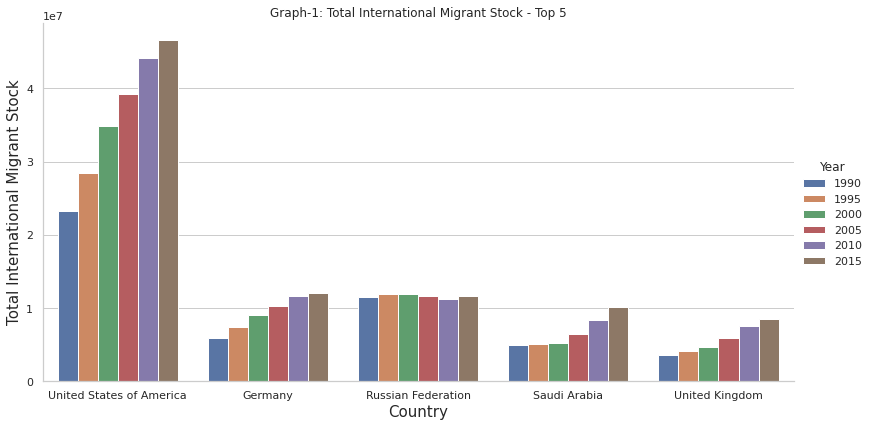

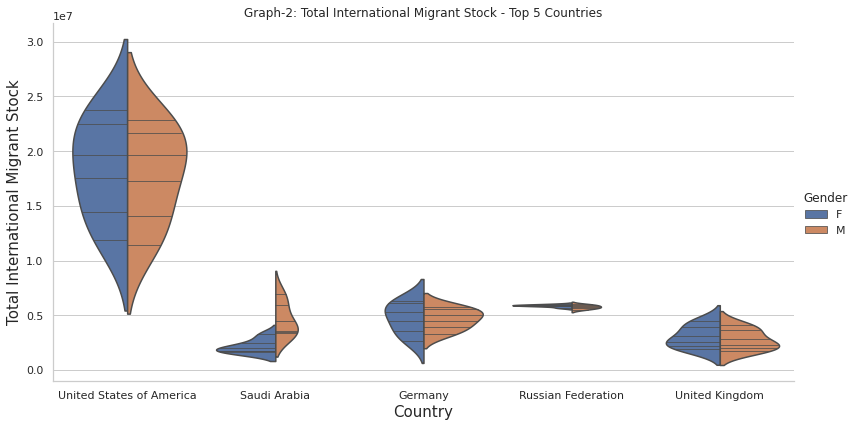

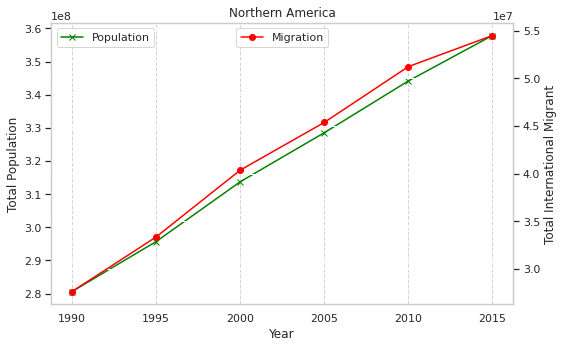

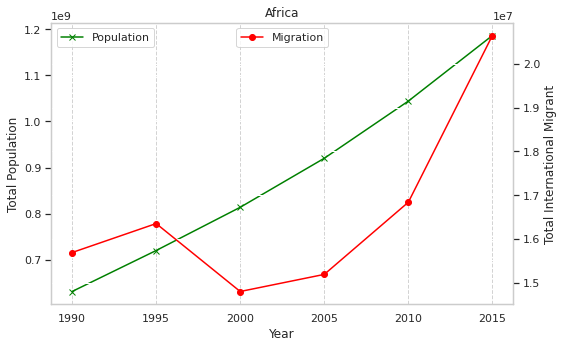

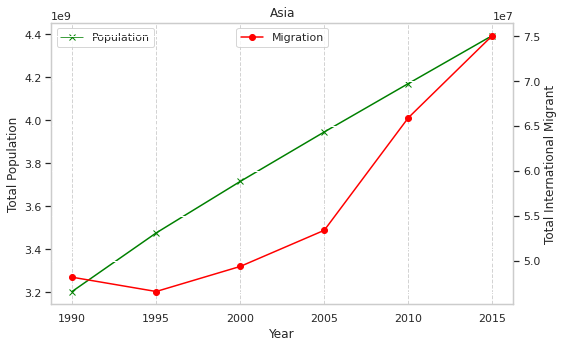

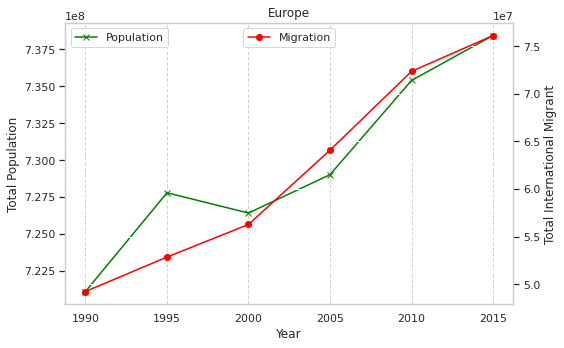

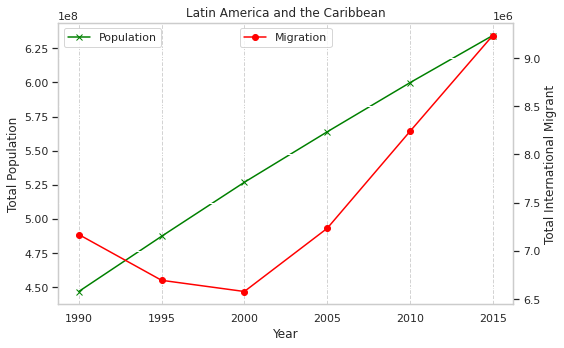

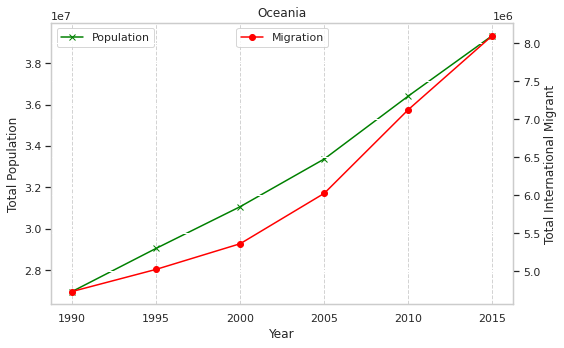

Africa


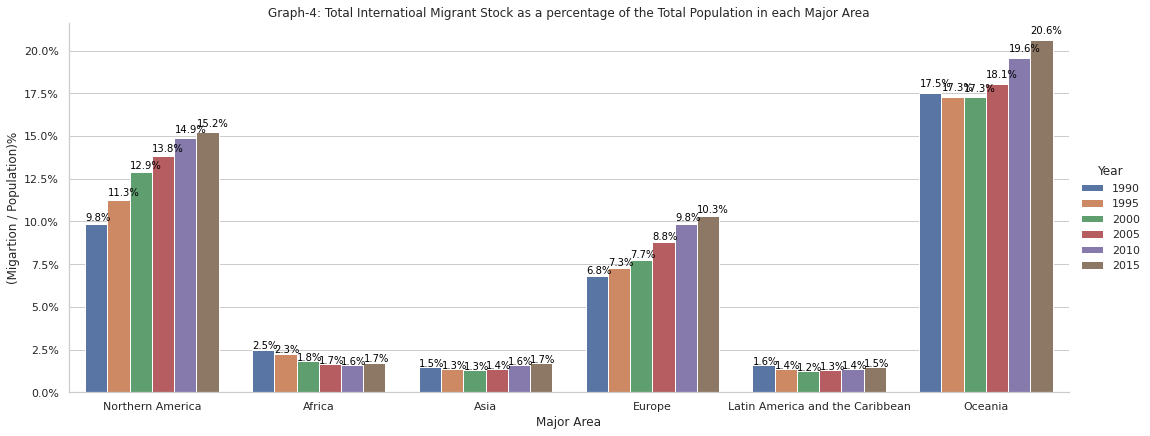

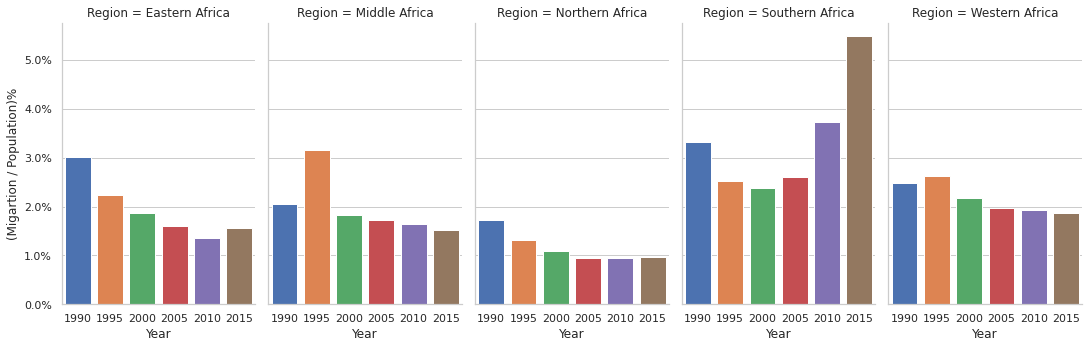

Asia


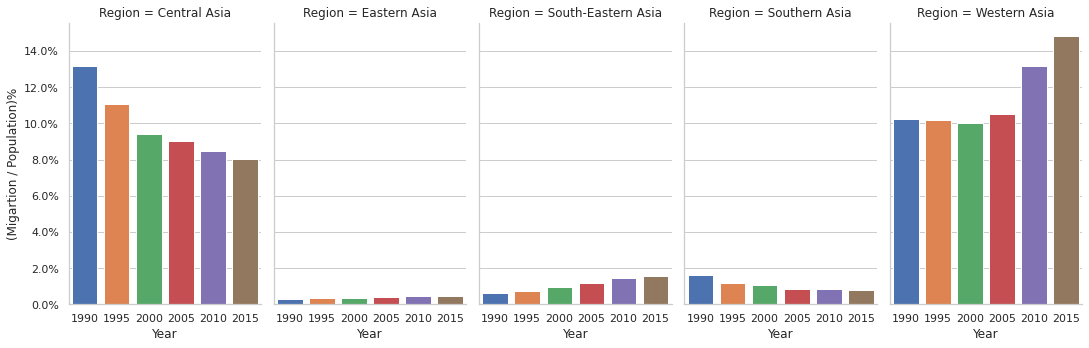

Europe


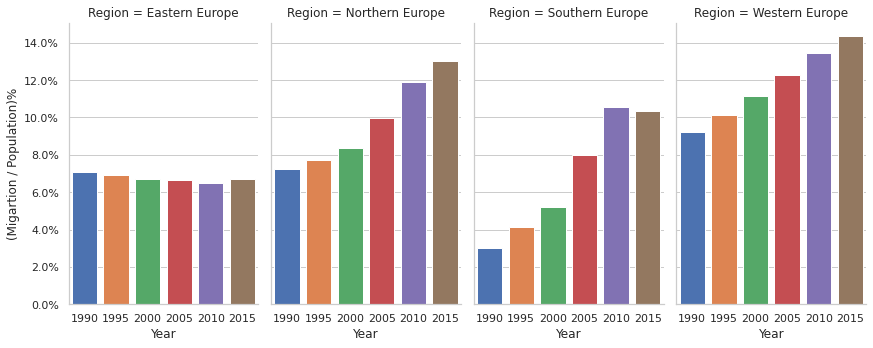

Latin America and the Caribbean


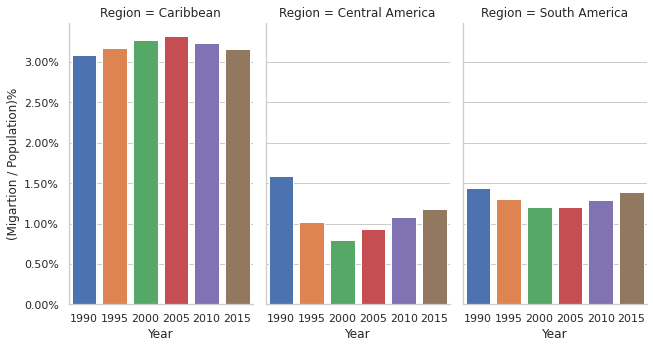

Northern America


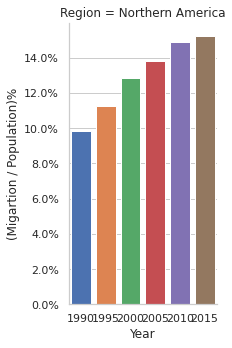

Oceania


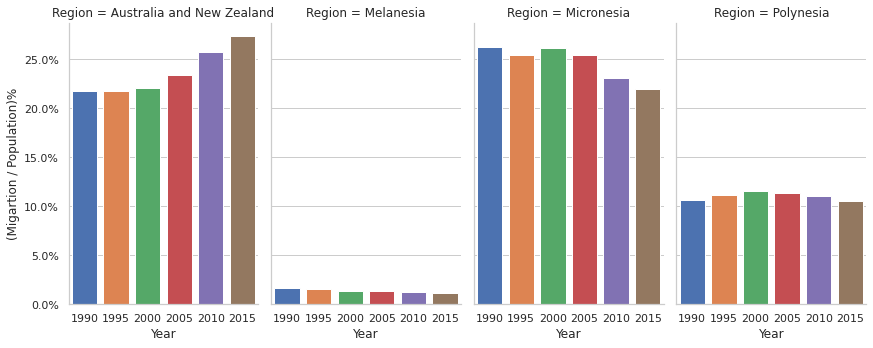

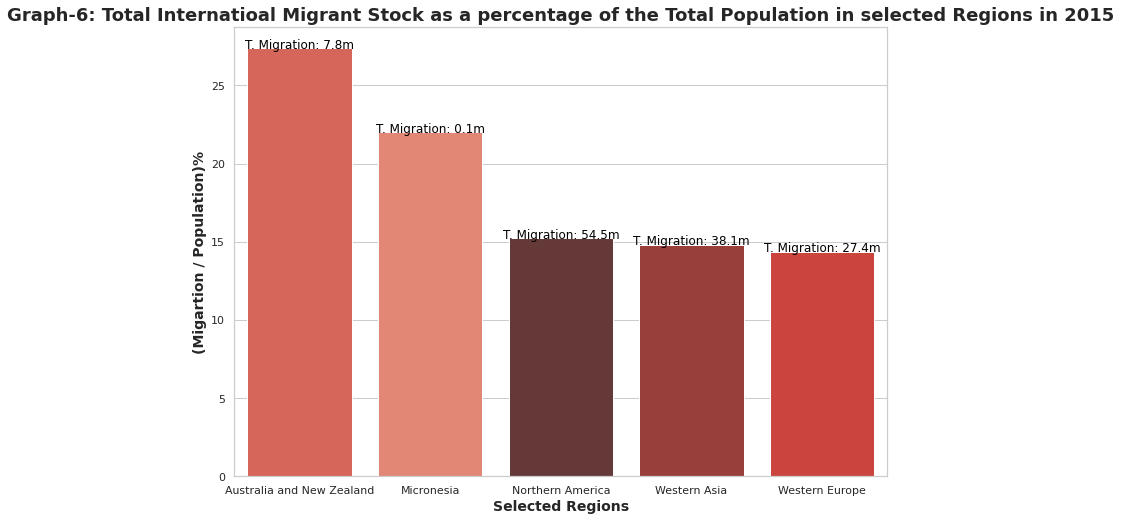

Africa


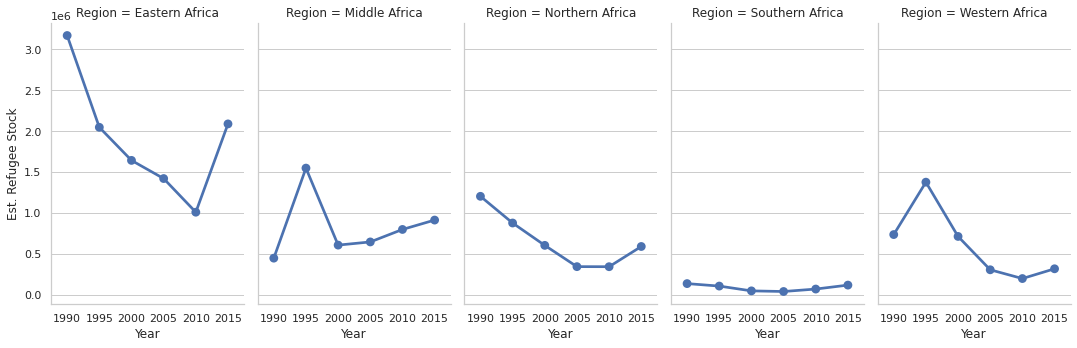

Asia


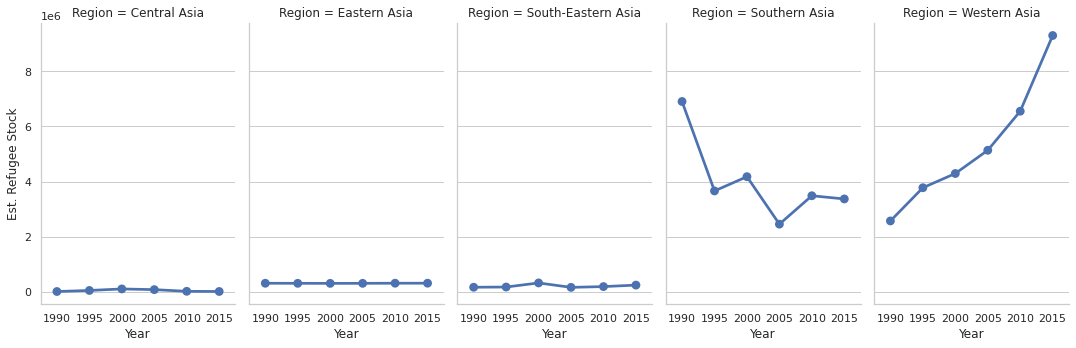

Europe


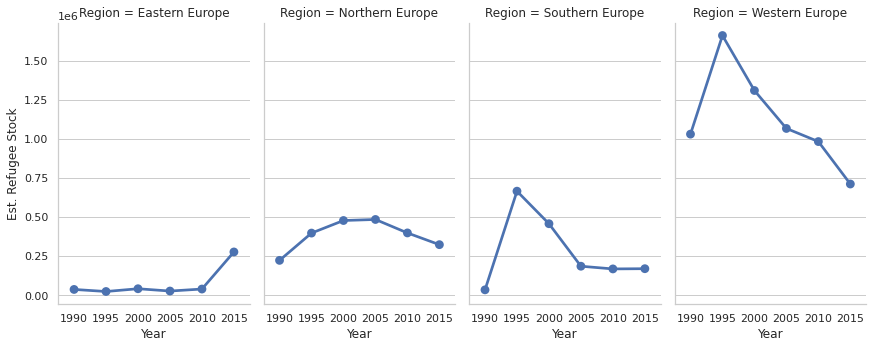

Latin America and the Caribbean


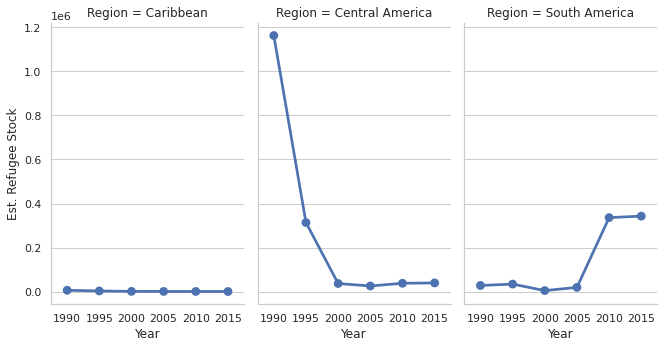

Northern America


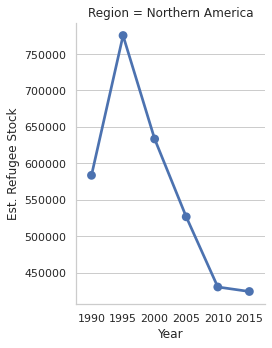

Oceania


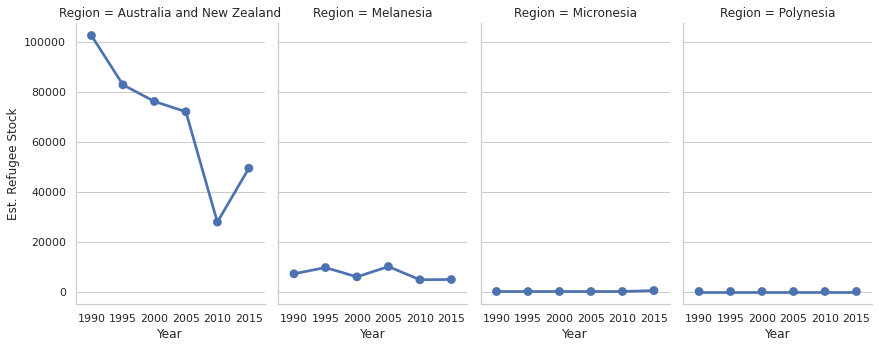

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


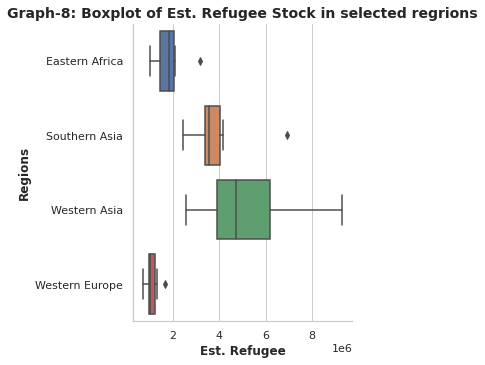

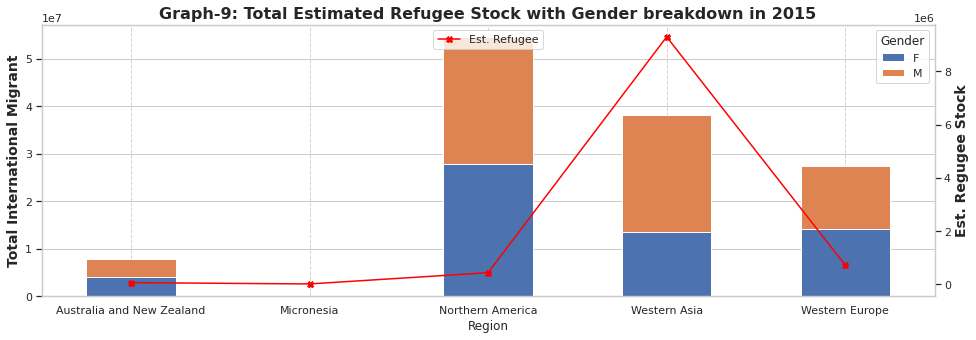

In [217]:

import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from  matplotlib.ticker import PercentFormatter

Dataset_1 = pd.read_csv('./Dataset_1.csv')
Dataset_2 = pd.read_csv('./Dataset_2.csv')
Annex = pd.read_csv('./Annex.csv')

# Shortening the long Title 
Annex.loc[Annex['Title'] == "United Kingdom of Great Britain and Northern Ireland",'Title'] = 'United Kingdom'

# Northern America is one Majro Area with one Region

Dataset_1_A = pd.merge(Dataset_1,Annex,on='Code')
IntMig_NA = Dataset_1_A[(Dataset_1_A['Group'] == 'Region') &  (Dataset_1_A['Region'] == 'Northern America')]
IntMig_NA['Group'] = 'Major_Area'
IntMig_NA['Major_Area'] = 'Major_Area'
Frame = [IntMig_NA,Dataset_1_A]
Dataset_1_A = pd.concat(Frame)

Dataset_1_A.to_csv('Dataset_1_A.csv')

# ===============================================================================================
# ===================================== The World's Trend ===========================================



#IntMig_Country = pd.merge(Dataset_1,Annex,on='Code')
IntMig_Country = Dataset_1_A[(Dataset_1_A['Group'] == 'WORLD') & (Dataset_1_A['Gender'] == 'T')

                               ]
 
IntMig = IntMig_Country[['Year','Table_2','Table_1','Table_6_Est','Table_3']]


IntMig["Ref_Rate"] = IntMig["Table_6_Est"] / IntMig["Table_2"] * 100


IntMig = IntMig.rename(columns = {'Table_1': 'Total Est. Migarnt',
                                  'Table_2': 'Total Est. Population',
                                  'Table_3': 'Migrant / Population',
                                  'Table_6_Est': 'Total Est. Refugee',
                                  'Ref_Rate': 'Refugee / Population'})


#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

print("Table-1: The world's trend: Population vs migration growth rate" )
display(IntMig.head(20).style.format({"Total Est. Population": "{:10,.0f}",
                               "Total Est. Migarnt": "{:10,.0f}",
                               "Migrant / Population": "{:,.2f}%",
                               "Total Est. Refugee": "{:10,.0f}",
                               "Refugee / Population": "{:,.2f}%"
                                     })

       )



# ===============================================================================================
# ===================================== Summary Table ===========================================


#IntMig_Country = pd.merge(Dataset_1,Annex,on='Code')

IntMig_Country = Dataset_1_A[(Dataset_1_A['Group'] == 'Country_or_Area') & (Dataset_1_A['Gender'] == 'T')
                               ]
MyList = ["","","","","",""]
SummaryTable = pd.DataFrame([], columns = ["Year", "Rank-1","Rank-2","Rank-3","Rank-4","Rank-5"])
i = 1
j = 0

for eachYear in IntMig_Country['Year'].unique():
    IntMig = IntMig_Country[(IntMig_Country['Year'] == eachYear)]
    IntMig = IntMig.sort_values(["Table_1",'Year'], ascending=False)
    IntMig = IntMig[['Title','Year']]
    TopCount =  IntMig.head(5)
    MyList[0]= eachYear
    i = 1
    for Country in TopCount['Title']:
        if Country == "United Kingdom of Great Britain and Northern Ireland":
            Country = "United Kingdom"
        MyList[i] = Country
        i = i + 1
    a_series = pd.Series(MyList, index = SummaryTable.columns)
    SummaryTable = SummaryTable.append(a_series, ignore_index=True)

    pd.set_option('display.max_columns', None) 

# ======================================
print("Table-2: Total International Migrant Stock - Top 5 Countries" )
display(SummaryTable.head(10))


# ===================================== Bar Plot ===========================================
# ===================================== Bar Plot ===========================================

#IntMig_Country = pd.merge(Dataset_1,Annex,on='Code')
IntMig_Country = Dataset_1_A[(Dataset_1_A['Group'] == 'Country_or_Area') & (Dataset_1_A['Gender'] == 'T')
                               & (  (Dataset_1_A['Code'] == 840 ) 
                                  | (Dataset_1_A['Code'] ==  276)
                                  | (Dataset_1_A['Code'] ==  643)
                                  | (Dataset_1_A['Code'] ==  682)
                                  | (Dataset_1_A['Code'] ==  826)
                                 )
                               
                               ]

        

IntMig_Country = IntMig_Country.sort_values(["Table_1",'Year'], ascending=False)
IntMig_Country = IntMig_Country[['Title','Table_1','Year']]
sns.set_theme(style="whitegrid")
ax = sns.catplot(x="Title", y="Table_1", kind="bar",hue = 'Year', data=IntMig_Country,height=6, aspect=15/8)
plt.xticks(rotation = 0)
plt.title('Graph-1: Total International Migrant Stock - Top 5')
plt.xlabel('Country', fontsize=15)
plt.ylabel('Total International Migrant Stock', fontsize=15)
plt.show()



#================================ violin plot ====================================

#IntMig_Country = pd.merge(Dataset_1,Annex,on='Code')
IntMig_Country = Dataset_1_A[(Dataset_1_A['Group'] == 'Country_or_Area') 
                                & (Dataset_1_A['Gender'] != 'T')
#                                & (Dataset_1_A['Year'] == 2010)
                                & ( (Dataset_1_A['Code'] == 840 ) 
                                  | (Dataset_1_A['Code'] ==  276)
                                  | (Dataset_1_A['Code'] ==  643)
                                  | (Dataset_1_A['Code'] ==  682)
                                  | (Dataset_1_A['Code'] ==  826)
                                 )
                               
                               ]
IntMig_Country = IntMig_Country.sort_values(["Table_1",'Year'], ascending=False)
IntMig_Country = IntMig_Country[['Title','Table_1','Gender','Year']]
sns.set_theme(style="whitegrid")
ax = sns.catplot(data=IntMig_Country, x="Title", y="Table_1", kind="violin",inner="stick", hue = 'Gender', split = True, height=6, aspect=15/8)
plt.xticks(rotation = 0)
plt.title('Graph-2: Total International Migrant Stock - Top 5 Countries')
plt.xlabel('Country', fontsize=15)
plt.ylabel('Total International Migrant Stock', fontsize=15)
plt.show()


#====================================================================================
# Graph 3


# Migration as the Rate of Population

#IntMig_Country = pd.merge(Dataset_1,Annex,on='Code')
IntMig_Country = Dataset_1_A[(Dataset_1_A['Group'] == 'Major_Area') & (Dataset_1_A['Gender'] == 'T')]
#IntMig = IntMig_Country[['Title','Year','Table_2','Table_1','Table_3','Table_6_Est']]
IntMig = IntMig_Country[['Year','Table_1','Title','Table_2']]


for t in IntMig['Title'].unique():
#    sns.set_theme(style="ticks")
    df1 =IntMig[(IntMig['Title'] == t)] 
    fig, ax = plt.subplots(figsize=(8,5))
    ax2 = ax.twinx()
    ax.plot(df1['Year'], df1['Table_2'], color='green', marker='x')
#    ax.set_ylim([5000000, 7000000000])
    ax2.plot(df1['Year'], df1['Table_1'], color='red', marker='o')
#    ax2.set_ylim([5000000, 7000000000])
    ax.set_title( t)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Population')
    ax2.set_ylabel('Total International Migrant')
    ax.legend(['Population'])
    ax2.legend(['Migration'], loc='upper center')
    ax.set_xticks(df1['Year'])
    ax.set_xticklabels(df1['Year'], rotation=0)
    ax.yaxis.grid(color='white')
    ax.xaxis.grid(color = 'lightgrey', linestyle ='--',linewidth=1)
    ax2.yaxis.grid(color='white')
    plt.tight_layout()
    plt.show()

#=========================================================================================================
# Graph 4
# Migration as the Rate of Population

#IntMig_Country = pd.merge(Dataset_1,Annex,on='Code')
IntMig_Country = Dataset_1_A[(Dataset_1_A['Group'] == 'Major_Area') & (Dataset_1_A['Gender'] == 'T')]
IntMig = IntMig_Country[['Title','Year','Table_2','Table_1','Table_3','Table_6_Est']]

sns.set_theme(style="whitegrid")
#sns.set(style = "ticks")
g  = sns.catplot(data = IntMig, x="Title", y="Table_3", kind="bar",hue = "Year", ci=None,height=6, aspect=20/8)
g.set(xlabel='Major Area', ylabel='(Migartion / Population)%')
plt.title('Graph-4: Total Internatioal Migrant Stock as a percentage of the Total Population in each Major Area')


ax = g.facet_axis(0,0)

for p in ax.patches:
    ax.text(p.get_x() + 0.002,p.get_height() * 1.02, '{0:.1f}%'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size=10)

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(100/1))


#=========================================================================================================
# Graph 5
# Major Area > Regions
    
IntMig_Country = Dataset_1_A.copy()


for major in IntMig_Country['Major_Area'].unique():
    
    if major != "Major_Area" and len(str(major)) > 3:
        IntMig_C = IntMig_Country[(IntMig_Country['Major_Area'] == major ) & (IntMig_Country['Gender'] == 'T') &
                                        (IntMig_Country['Group'] == 'Region')
                                       ]
        print(major)
        IntMig = IntMig_C[['Region','Year','Table_2','Table_1','Table_3']]
        sns.set_theme(style="whitegrid")
        g = sns.catplot(data=IntMig, x="Year", y="Table_3", col="Region",saturation=20,kind="bar", ci=None, aspect=.6)
        g.set(ylabel='(Migartion / Population)%')
        ax = g.facet_axis(0,0)
        for ax in g.axes.flat:
            ax.yaxis.set_major_formatter(PercentFormatter(100/1))
        plt.show()





#=================================================================================================
# Graph 6

IntMig_Country = Dataset_1_A.copy()

IntMig_Country = IntMig_Country[(IntMig_Country['Major_Area'] == 'Asia') & (IntMig_Country['Region'] == 'Western Asia') |
                                (IntMig_Country['Major_Area'] == 'Europe') & (IntMig_Country['Region'] == 'Western Europe') |
                                (IntMig_Country['Major_Area'] == 'Northern America') & (IntMig_Country['Region'] == 'Northern America') |
                                (IntMig_Country['Major_Area'] == 'Oceania') & (IntMig_Country['Region'] == 'Australia and New Zealand') |
                                (IntMig_Country['Major_Area'] == 'Oceania') & (IntMig_Country['Region'] == 'Micronesia')
                               ]


IntMig_Country = IntMig_Country[(IntMig_Country['Gender'] == 'T') &
                                (IntMig_Country['Group'] == 'Region') &
                                (IntMig_Country['Year'] == 2015)]
   
          

df = IntMig_Country.copy()
groupedvalues=df.groupby('Region').sum().reset_index()

pal = sns.color_palette("Reds_d", len(groupedvalues))

rank = groupedvalues["Table_1"].argsort().argsort() 

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
g=sns.barplot(x='Region',y='Table_3',data=groupedvalues, palette=np.array(pal[::1])[rank])


plt.ylabel('(Migartion / Population)%', fontsize = 14,weight='bold' ) #, fontname = 'Arial', fontstyle = 'italic')
plt.xlabel('Selected Regions', fontsize = 14,weight='bold')

plt.title('Graph-6: Total Internatioal Migrant Stock as a percentage of the Total Population in selected Regions in 2015', fontsize = 18,weight='bold')


for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Table_3, 'T. Migration: {0:.1f}m'.format(row.Table_1/1000000), color='black', ha="center", fontsize = 12)

    

plt.show()



#========================================================================================
#========================================================================================
# Section 3 Est. Refugee Stock


# Graph 7 

IntMig_Country = Dataset_1_A.copy()



#IntMig_Country = IntMig_Country[(IntMig_Country['Group'] == 'Region') &
#                                (IntMig_Country['Gender'] == 'T')]


for major in IntMig_Country['Major_Area'].unique():
    
    if major != "Major_Area" and len(str(major)) > 3:
        IntMig_C = IntMig_Country[(IntMig_Country['Major_Area'] == major ) & (IntMig_Country['Gender'] == 'T') &
                                        (IntMig_Country['Group'] == 'Region')
                                       ]
        print(major)
#        IntMig = IntMig_C[['Region','Year','Table_2','Table_1','Table_3']]
        df = IntMig_C[['Year','Title','Major_Area','Region','Table_6_Est']]
        sns.set_theme(style="whitegrid")
        g = sns.catplot(data=df, x="Year", y="Table_6_Est", col="Region",col_wrap=6,saturation=20,kind="point", ci=None, aspect=.6)
        g.set(ylabel='Est. Refugee Stock')
        plt.show()
        
        
#========================================================================================
#========================================================================================
# Graph 8        

IntMig_Country = Dataset_1_A.copy()

IntMig_Country = IntMig_Country[(IntMig_Country['Major_Area'] == 'Asia') & (IntMig_Country['Region'] == 'Western Asia') |
                                (IntMig_Country['Major_Area'] == 'Europe') & (IntMig_Country['Region'] == 'Western Europe') |
                                (IntMig_Country['Major_Area'] == 'Africa') & (IntMig_Country['Region'] == 'Eastern Africa') |
                                (IntMig_Country['Major_Area'] == 'Asia') & (IntMig_Country['Region'] == 'Southern Asia') 
                               ]




IntMig_Country = IntMig_Country[(IntMig_Country['Group'] == 'Region') &
                                (IntMig_Country['Gender'] == 'T')]


df = IntMig_Country[['Year','Title','Major_Area','Region','Table_6_Est']]
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.catplot('Table_6_Est','Region', data = df, kind = 'box',orient = 'h')
plt.ylabel('Regions',fontsize = 12, weight = 'bold')
plt.xlabel('Est. Refugee',fontsize = 12, weight = 'bold')
plt.title("Graph-8: Boxplot of Est. Refugee Stock in selected regrions",fontsize = 14, weight = 'bold')


#========================================================================================
#========================================================================================
# Graph 9 
IntMig_Country = Dataset_1_A.copy()

IntMig_Country = IntMig_Country[(IntMig_Country['Major_Area'] == 'Asia') & (IntMig_Country['Region'] == 'Western Asia') |
                                (IntMig_Country['Major_Area'] == 'Europe') & (IntMig_Country['Region'] == 'Western Europe') |
                                (IntMig_Country['Major_Area'] == 'Northern America') & (IntMig_Country['Region'] == 'Northern America') |
                                (IntMig_Country['Major_Area'] == 'Oceania') & (IntMig_Country['Region'] == 'Australia and New Zealand') |
                                (IntMig_Country['Major_Area'] == 'Oceania') & (IntMig_Country['Region'] == 'Micronesia')
                               ]


IntMig_Country = IntMig_Country[(IntMig_Country['Group'] == 'Region') &
                                (IntMig_Country['Year'] == 2015)]



df1 = IntMig_Country[(IntMig_Country['Gender'] != 'T')].copy()
df2 = IntMig_Country[(IntMig_Country['Gender'] == 'T')].copy()


df1 = df1[['Region','Table_1','Gender']]
df2 = df2[['Region','Table_6_Est']]


#display(df1.head())
#display(df2.head())

df_pv = df1.pivot_table(
    index = ['Region'], # 'Note','Type_of_Data',
    columns = 'Gender',
    values = 'Table_1'
)
df_pv = df_pv.reset_index()

df_pv = df_pv.sort_values(["Region"], ascending=True)
df2   = df2.sort_values(["Region"], ascending=True)



fig, ax = plt.subplots()
ax = df_pv.plot(x= 'Region', kind="bar", figsize=(16,5), stacked=True, ax=ax)
plt.xticks(rotation = 0)

ax2 = ax.twinx()
ax2 = df2.plot(x= 'Region', kind="line", color = 'red',figsize=(16,5), ax=ax2, marker = 'X')
plt.xticks(rotation = 0)
ax2.legend(['Est. Refugee'], loc='upper center')
plt.xlabel('Regions',fontsize = 14, weight = 'bold')
ax.set_ylabel('Total International Migrant',fontsize = 14, weight = 'bold')
ax2.set_ylabel('Est. Regugee Stock',fontsize = 14, weight = 'bold')


plt.grid(False)
ax.xaxis.grid(color = 'lightgrey', linestyle ='--',linewidth=1)



plt.title('Graph-9: Total Estimated Refugee Stock with Gender breakdown in 2015',fontsize = 16, weight = 'bold')



plt.show()

